# File and libraries

In [179]:
import pandas as pd
import numpy as np

filepath=r'dataset/df_msg_scaler_input'

file_tag = "df_msg_feat_eng_input"

# DSLabs functions

In [180]:
%run "scripts/dslabs_functions.py"


# Data functions

In [181]:
%run "scripts/data_functions.py"


data_functions lodaded


The F2 score is a variation of the F-score that places more emphasis on recall compared to precision. While the commonly used F1 score gives equal importance to both precision and recall, the F2 score weighs recall more heavily, meaning it prioritizes minimizing false negatives.

# Load

In [182]:

#test_data=True
test_data=False

# use to evaluate strategies. otherwise False to just transform data 
evaluate=True
# evaluate=False

def sample_per_day(group, fraction=0.1):
    return group.sample(frac=fraction)


if test_data==True:

    data=pd.read_csv(f"{filepath}.csv")
    
    test= pd.read_csv(f"{filepath}_test.csv")
    train= pd.read_csv(f"{filepath}_train.csv")

    sample=0.01
    data = data.groupby('day_of_year').apply(lambda x: sample_per_day(x, sample)).reset_index(drop=True)
    test = test.groupby('day_of_year').apply(lambda x: sample_per_day(x, sample)).reset_index(drop=True)
    train = train.groupby('day_of_year').apply(lambda x: sample_per_day(x, sample)).reset_index(drop=True)
    
    # create sample df version of test/train for variance studies
    test_sample= test
    train_sample= train
    
else:
    data=pd.read_csv(f"{filepath}.csv")

    
    test= pd.read_csv(f"{filepath}_test.csv")
    train= pd.read_csv(f"{filepath}_train.csv")

    # create sample for variance studies
    sample=0.1
    test_sample = test.groupby('day_of_year').apply(lambda x: sample_per_day(x, sample)).reset_index(drop=True)
    train_sample = train.groupby('day_of_year').apply(lambda x: sample_per_day(x, sample)).reset_index(drop=True)


 
target='is_clicked'
target_metric='f2'
vars: list[str] = data.columns.to_list()


# ensure sorting by day_of_year for correct splitting 
# "When in the presence of temporal data, data partition shall use older data to train and newer to test, in order to not use future data to classify past data. In any other case, partition shall be random."
data.sort_values(by='day_of_year', inplace=True)
test.sort_values(by='day_of_year', inplace=True)
train.sort_values(by='day_of_year', inplace=True)



data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 461961 entries, 0 to 461960
Data columns (total 28 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   platform                      461961 non-null  float64
 1   email_provider                461961 non-null  float64
 2   campaign_type                 461961 non-null  float64
 3   channel_cmp                   461961 non-null  float64
 4   topic                         461961 non-null  float64
 5   total_count                   461961 non-null  float64
 6   subject_length                461961 non-null  float64
 7   subject_with_personalization  461961 non-null  float64
 8   subject_with_deadline         461961 non-null  float64
 9   subject_with_emoji            461961 non-null  float64
 10  subject_with_bonuses          461961 non-null  float64
 11  subject_with_discount         461961 non-null  float64
 12  subject_with_saleout          461961 non-null  fl

In [183]:
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

Train shape: (323372, 28)
Test shape: (138589, 28)


# Feat 1 - Dropping Low Variance Variables

## Feat 1 - Study Low Variance Variables and Threshold

using sampled dataframe due to heavy processing

In [184]:
max_thresh=0.15
lag_variance=0.01

### precision

Testing threshold: 0.01
Dropping variables: ['email_provider', 'subject_with_personalization', 'subject_with_discount', 'subject_with_saleout']
Remaining features after drop: 24
Evaluation results at threshold 0.01: {'accuracy': [0.9629068340910731, 0.9778451324240456], 'recall': [0.2305194805194805, 0.003246753246753247], 'precision': [0.20402298850574713, 1.0], 'auc': [0.6050375836430157, 0.5016233766233766], 'f1': [0.21646341463414634, 0.006472491909385114], 'f2': [0.22468354430379747, 0.0040551500405515]}
Evaluation for precision: [0.20402298850574713, 1.0]
Testing threshold: 0.02
Dropping variables: ['email_provider', 'subject_length', 'subject_with_personalization', 'subject_with_bonuses', 'subject_with_discount', 'subject_with_saleout']
Remaining features after drop: 22
Evaluation results at threshold 0.02: {'accuracy': [0.9629068340910731, 0.9778451324240456], 'recall': [0.2305194805194805, 0.003246753246753247], 'precision': [0.20402298850574713, 1.0], 'auc': [0.60503758364301

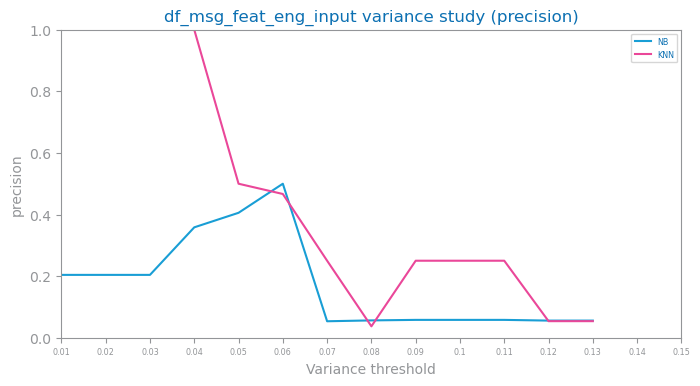

In [185]:
# modified study_variance_for_feature_selection() in dslabs functions to keep minimum variables and print metrics (due to error)
if evaluate==True:

    eval_metric = "precision"
    figure(figsize=(2 * HEIGHT, HEIGHT))
    study_variance_for_feature_selection(
        train_sample,
        test_sample,
        target=target,
        max_threshold=max_thresh,
        lag=lag_variance,
        metric=eval_metric,
        file_tag=file_tag,
        min_features_to_keep = 3  # Minimum features safeguard

    )
    show()

### recall

Testing threshold: 0.01
Dropping variables: ['email_provider', 'subject_with_personalization', 'subject_with_discount', 'subject_with_saleout']
Remaining features after drop: 24
Evaluation results at threshold 0.01: {'accuracy': [0.9629068340910731, 0.958937721007433], 'recall': [0.2305194805194805, 0.15584415584415584], 'precision': [0.20402298850574713, 0.13445378151260504], 'auc': [0.6050375836430157, 0.5665190223460207], 'f1': [0.21646341463414634, 0.1443609022556391], 'f2': [0.22468354430379747, 0.1510383889238515]}
Evaluation for recall: [0.2305194805194805, 0.15584415584415584]
Testing threshold: 0.02
Dropping variables: ['email_provider', 'subject_length', 'subject_with_personalization', 'subject_with_bonuses', 'subject_with_discount', 'subject_with_saleout']
Remaining features after drop: 22
Evaluation results at threshold 0.02: {'accuracy': [0.9629068340910731, 0.9599480407014506], 'recall': [0.2305194805194805, 0.1396103896103896], 'precision': [0.20402298850574713, 0.129129

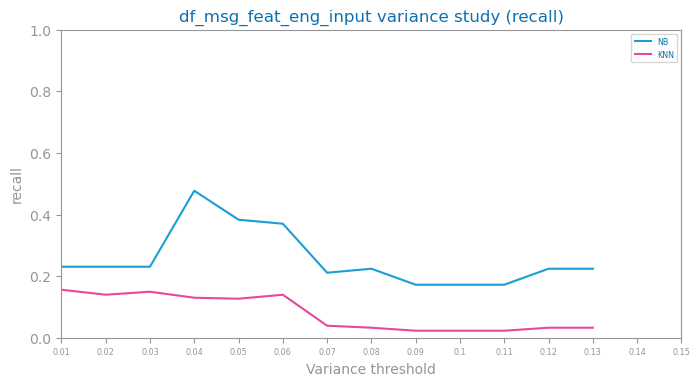

In [186]:
# modified study_variance_for_feature_selection() in dslabs functions to keep minimum variables and print metrics (due to error)
if evaluate==True:

    eval_metric = "recall"
    figure(figsize=(2 * HEIGHT, HEIGHT))
    study_variance_for_feature_selection(
        train_sample,
        test_sample,
        target=target,
        max_threshold=max_thresh,
        lag=lag_variance,
        metric=eval_metric,
        file_tag=file_tag,
        min_features_to_keep = 3  # Minimum features safeguard

    )
    show()

### f2

Testing threshold: 0.01
Dropping variables: ['email_provider', 'subject_with_personalization', 'subject_with_discount', 'subject_with_saleout']
Remaining features after drop: 24
Evaluation results at threshold 0.01: {'accuracy': [0.9629068340910731, 0.958937721007433], 'recall': [0.2305194805194805, 0.15584415584415584], 'precision': [0.20402298850574713, 0.13445378151260504], 'auc': [0.6050375836430157, 0.5665190223460207], 'f1': [0.21646341463414634, 0.1443609022556391], 'f2': [0.22468354430379747, 0.1510383889238515]}
Evaluation for f2: [0.22468354430379747, 0.1510383889238515]
Testing threshold: 0.02
Dropping variables: ['email_provider', 'subject_length', 'subject_with_personalization', 'subject_with_bonuses', 'subject_with_discount', 'subject_with_saleout']
Remaining features after drop: 22
Evaluation results at threshold 0.02: {'accuracy': [0.9629068340910731, 0.9599480407014506], 'recall': [0.2305194805194805, 0.1396103896103896], 'precision': [0.20402298850574713, 0.1291291291

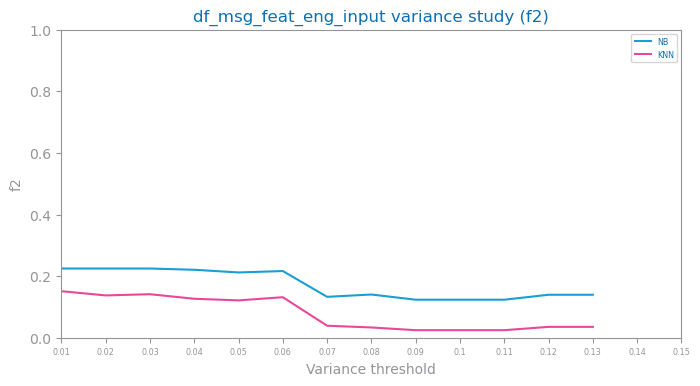

In [187]:
if evaluate==True:

    eval_metric = "f2"
    figure(figsize=(2 * HEIGHT, HEIGHT))
    study_variance_for_feature_selection(
        train_sample,
        test_sample,
        target=target,
        max_threshold=max_thresh,
        lag=lag_variance,
        metric=eval_metric,
        file_tag=file_tag,
        min_features_to_keep = 3  # Minimum features safeguard

    )
    show()

### accuracy study

In [188]:
#f evaluate==True:
#
#   eval_metric = "accuracy"
#   figure(figsize=(2 * HEIGHT, HEIGHT))
#   study_variance_for_feature_selection(
#       train_sample,
#       test_sample,
#       target=target,
#       max_threshold=0.1,
#       lag=0.003,
#       metric=eval_metric,
#       file_tag=file_tag,
#       min_features_to_keep = 10  # Minimum features safeguard
#
#   )
#   show()

## Feat 1 strategy Application

In [189]:
from pandas import DataFrame, Index

def apply_strategy_1(df: DataFrame) -> DataFrame:

    # this script is available in data_functions originally from DSLabs site in Feature Selection chapter
    # threshold drop on recall nb is around 0.4 but precision increases
    df_copy=apply_remove_low_variance_variables(df,max_threshold=0.06, target=target, min_features_to_keep=3, exclude=['day_of_year'])
    

    return df_copy


data_1=apply_strategy_1(data)

data_1.describe()


Variance threshold: 0.06, Remaining features: 18
Variables to drop: ['email_provider', 'topic', 'subject_length', 'subject_with_personalization', 'subject_with_deadline', 'subject_with_bonuses', 'subject_with_discount', 'subject_with_saleout', 'hour_cos']
columns to drop: ['email_provider', 'topic', 'subject_length', 'subject_with_personalization', 'subject_with_deadline', 'subject_with_bonuses', 'subject_with_discount', 'subject_with_saleout', 'hour_cos']
Remaining columns: Index(['platform', 'campaign_type', 'channel_cmp', 'total_count',
       'subject_with_emoji', 'day_of_year', 'is_weekend', 'month',
       'time_of_day', 'hour_sin', 'min_sin', 'min_cos', 'day_of_month_sin',
       'day_of_month_cos', 'day_of_week_nr_sin', 'day_of_week_nr_cos',
       'week_of_month_sin', 'week_of_month_cos', 'is_clicked'],
      dtype='object')


,platform,campaign_type,channel_cmp,total_count,subject_with_emoji,day_of_year,is_weekend,month,time_of_day,hour_sin,min_sin,min_cos,day_of_month_sin,day_of_month_cos,day_of_week_nr_sin,day_of_week_nr_cos,week_of_month_sin,week_of_month_cos,is_clicked
count,461961.000000,461961.000000,461961.000000,461961.000000,461961.000000,461961.000000,461961.000000,461961.000000,461961.000000,461961.000000,461961.000000,461961.000000,461961.000000,461961.000000,461961.000000,461961.000000,461961.000000,461961.000000,461961.000000
mean,0.781768,0.210025,0.636812,0.505292,0.784425,0.402177,0.078450,0.513233,0.146227,0.789252,0.491183,0.514643,0.507318,0.543946,0.456909,0.307096,0.594455,0.483040,0.020751
std,0.252864,0.391072,0.376462,0.391507,0.410798,0.267749,0.268879,0.260906,0.353334,0.255817,0.336385,0.369721,0.365337,0.339580,0.370938,0.328937,0.376743,0.314414,0.142549
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.666667,0.000000,0.500000,0.129259,1.000000,0.133333,0.000000,0.500000,0.000000,0.810825,0.161000,0.150575,0.137137,0.191980,0.000000,0.000000,0.500000,0.500000,0.000000
50%,0.800000,0.000000,0.500000,0.623658,1.000000,0.444444,0.000000,0.500000,0.000000,0.906701,0.500000,0.539770,0.399399,0.574436,0.500000,0.250000,0.500000,0.500000,0.000000
75%,1.000000,0.000000,1.000000,0.881958,1.000000,0.600000,0.000000,0.500000,0.000000,0.971134,0.819000,0.930965,0.825826,0.844110,0.500000,0.250000,1.000000,0.500000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feat 1 train/test split 

Labels=[0.0, 1.0]


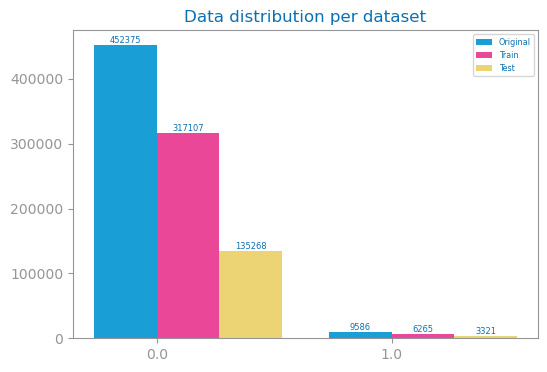

In [190]:
if evaluate==True:

    from pandas import concat
    from matplotlib.pyplot import figure, show
    from sklearn.model_selection import train_test_split
    from dslabs_functions import plot_multibar_chart

    # Call the function to split the data
    from numpy import array, ndarray

    y_1, X_1, labels, values = define_target_and_prepare_data(data_1, target)

    train_1, test_1 = split_data_save_csv(pd.DataFrame(X_1, columns=data_1.columns), y_1, data_columns=data_1.columns, target_column=target)

    # Distribution check
    values["Train"] = [
        len(train_1[train_1[target] == 0]),
        len(train_1[train_1[target] == 1]),
    ]
    values["Test"] = [
        len(test_1[test_1[target] == 0]),
        len(test_1[test_1[target] == 1]),
    ]

    # Visualize the distribution
    figure(figsize=(6, 4))
    plot_multibar_chart(labels, values, title="Data distribution per dataset")
    show()

## Feat 1 evaluate

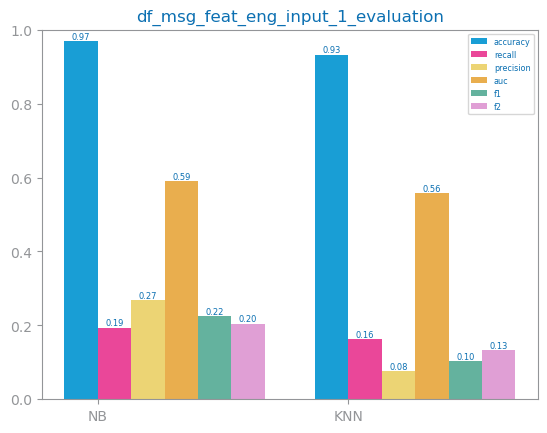

In [191]:
if evaluate==True:

    # evaluate_approach is in data_functions originally from DSLABS/ Data Prep / Methodology
    # removed Multinomial from run_NB function because dataset has negative values

    figure()
    eval_1: dict[str, list] = evaluate_approach(train_1, test_1, target='is_clicked', metric=target_metric)
    plot_multibar_chart(
        ["NB", "KNN"], eval_1, title=f"{file_tag}_1_evaluation", percentage=True
    )
    savefig(f"images/{file_tag}_1_evaluation.png")
    show()

# Feat 2 - Dropping Redundant Variables


## Feat 2 - Study redundant variables and threshold

In [171]:
min_thresh=0.15
lag_redundacy=0.05

### precision

Columns in the train dataset: ['platform', 'email_provider', 'campaign_type', 'channel_cmp', 'topic', 'total_count', 'subject_length', 'subject_with_personalization', 'subject_with_deadline', 'subject_with_emoji', 'subject_with_bonuses', 'subject_with_discount', 'subject_with_saleout', 'day_of_year', 'is_weekend', 'month', 'time_of_day', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos', 'day_of_month_sin', 'day_of_month_cos', 'day_of_week_nr_sin', 'day_of_week_nr_cos', 'week_of_month_sin', 'week_of_month_cos']
Variables considered for correlation: ['platform', 'email_provider', 'campaign_type', 'channel_cmp', 'topic', 'total_count', 'subject_length', 'subject_with_personalization', 'subject_with_deadline', 'subject_with_emoji', 'subject_with_bonuses', 'subject_with_discount', 'subject_with_saleout', 'day_of_year', 'is_weekend', 'month', 'time_of_day', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos', 'day_of_month_sin', 'day_of_month_cos', 'day_of_week_nr_sin', 'day_of_week_nr_cos', 'week_of_m

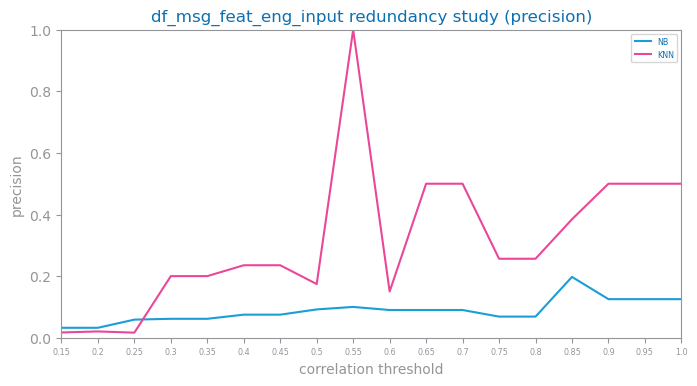

In [172]:
if evaluate==True:

    # modified study_variance_for_feature_selection() in dslabs functions to keep minimum variables and print metrics (due to error)


    eval_metric = "precision"
    figure(figsize=(2 * HEIGHT, HEIGHT))
    study_redundancy_for_feature_selection(
        train_sample,
        test_sample,
        target=target,
        min_threshold = min_thresh,
        lag = lag_redundacy,
        metric=eval_metric,
        file_tag=file_tag,
    )
    show()

### recall

Columns in the train dataset: ['platform', 'email_provider', 'campaign_type', 'channel_cmp', 'topic', 'total_count', 'subject_length', 'subject_with_personalization', 'subject_with_deadline', 'subject_with_emoji', 'subject_with_bonuses', 'subject_with_discount', 'subject_with_saleout', 'day_of_year', 'is_weekend', 'month', 'time_of_day', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos', 'day_of_month_sin', 'day_of_month_cos', 'day_of_week_nr_sin', 'day_of_week_nr_cos', 'week_of_month_sin', 'week_of_month_cos']
Variables considered for correlation: ['platform', 'email_provider', 'campaign_type', 'channel_cmp', 'topic', 'total_count', 'subject_length', 'subject_with_personalization', 'subject_with_deadline', 'subject_with_emoji', 'subject_with_bonuses', 'subject_with_discount', 'subject_with_saleout', 'day_of_year', 'is_weekend', 'month', 'time_of_day', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos', 'day_of_month_sin', 'day_of_month_cos', 'day_of_week_nr_sin', 'day_of_week_nr_cos', 'week_of_m

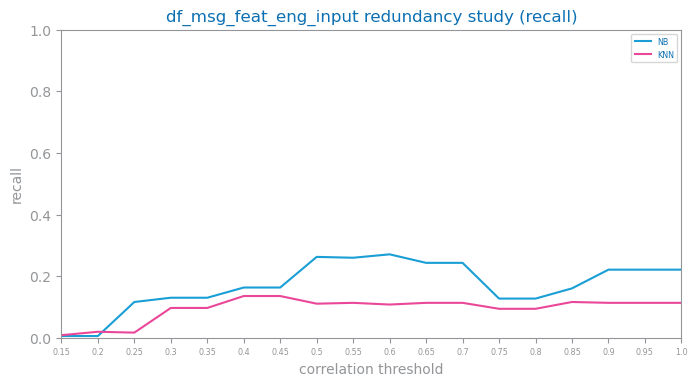

In [173]:
if evaluate==True:

    # modified study_variance_for_feature_selection() in dslabs functions to keep minimum variables and print metrics (due to error)


    eval_metric = "recall"
    figure(figsize=(2 * HEIGHT, HEIGHT))
    study_redundancy_for_feature_selection(
        train_sample,
        test_sample,
        target=target,
        min_threshold = min_thresh,
        lag = lag_redundacy,
        metric=eval_metric,
        file_tag=file_tag,
    )
    show()

### f2

Columns in the train dataset: ['platform', 'email_provider', 'campaign_type', 'channel_cmp', 'topic', 'total_count', 'subject_length', 'subject_with_personalization', 'subject_with_deadline', 'subject_with_emoji', 'subject_with_bonuses', 'subject_with_discount', 'subject_with_saleout', 'day_of_year', 'is_weekend', 'month', 'time_of_day', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos', 'day_of_month_sin', 'day_of_month_cos', 'day_of_week_nr_sin', 'day_of_week_nr_cos', 'week_of_month_sin', 'week_of_month_cos']


Variables considered for correlation: ['platform', 'email_provider', 'campaign_type', 'channel_cmp', 'topic', 'total_count', 'subject_length', 'subject_with_personalization', 'subject_with_deadline', 'subject_with_emoji', 'subject_with_bonuses', 'subject_with_discount', 'subject_with_saleout', 'day_of_year', 'is_weekend', 'month', 'time_of_day', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos', 'day_of_month_sin', 'day_of_month_cos', 'day_of_week_nr_sin', 'day_of_week_nr_cos', 'week_of_month_sin', 'week_of_month_cos']
Variables to drop at threshold 0.15: ['day_of_year', 'min_sin', 'min_cos', 'day_of_month_cos', 'day_of_week_nr_sin', 'week_of_month_sin', 'week_of_month_cos', 'channel_cmp', 'topic', 'total_count', 'subject_length', 'subject_with_emoji', 'is_weekend', 'month', 'time_of_day', 'hour_sin', 'day_of_week_nr_cos', 'campaign_type', 'day_of_month_sin', 'subject_with_deadline', 'subject_with_bonuses', 'hour_cos', 'platform']
Evaluation results at threshold 0.15: {'accuracy': [0.960597

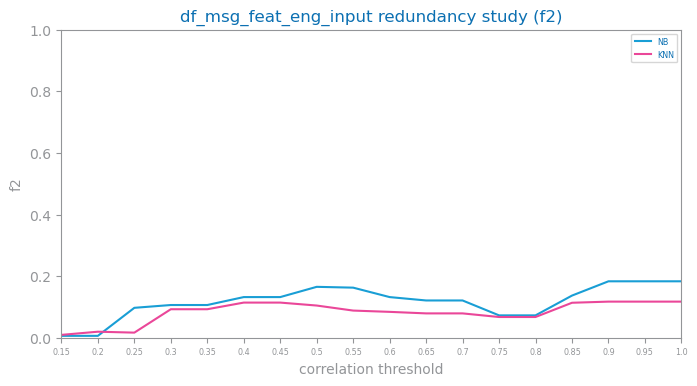

In [174]:
if evaluate==True:

    # modified study_variance_for_feature_selection() in dslabs functions to keep minimum variables and print metrics (due to error)


    eval_metric = 'f2'
    figure(figsize=(2 * HEIGHT, HEIGHT))
    study_redundancy_for_feature_selection(
        train_sample,
        test_sample,
        target=target,
        min_threshold = min_thresh,
        lag = lag_redundacy,
        metric=eval_metric,
        file_tag=file_tag,
    )
    show()

### accruracy

In [175]:
#if evaluate==True:
#
#    # modified study_variance_for_feature_selection() in dslabs functions to keep minimum variables and print metrics (due to error)
#
#
#    eval_metric = "accuracy"
#    figure(figsize=(2 * HEIGHT, HEIGHT))
#    study_redundancy_for_feature_selection(
#        train_sample,
#        test_sample,
#        target=target,
#        min_threshold = 0.001,
#        lag = 0.2,
#        metric=eval_metric,
#        file_tag=file_tag,
#    )
#    show()

## Feat 2 strategy aplication

In [192]:

def apply_strategy_2(df):


    df_copy = apply_remove_redundant_variables(df, min_threshold=0.9, exclude=['day_of_year'], target=target)


    return df_copy


data_2=data.copy()

data_2=apply_strategy_2(data_2)


columns to drop: []
Remaining columns: Index(['platform', 'email_provider', 'campaign_type', 'channel_cmp', 'topic',
       'total_count', 'subject_length', 'subject_with_personalization',
       'subject_with_deadline', 'subject_with_emoji', 'subject_with_bonuses',
       'subject_with_discount', 'subject_with_saleout', 'day_of_year',
       'is_weekend', 'month', 'time_of_day', 'hour_sin', 'hour_cos', 'min_sin',
       'min_cos', 'day_of_month_sin', 'day_of_month_cos', 'day_of_week_nr_sin',
       'day_of_week_nr_cos', 'week_of_month_sin', 'week_of_month_cos',
       'is_clicked'],
      dtype='object')


## Feat 2 train/test split 

Labels=[0.0, 1.0]


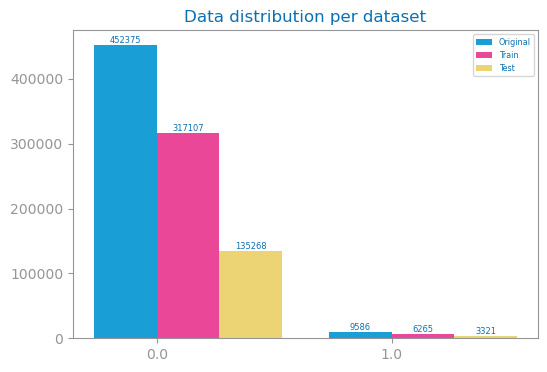

In [193]:
if evaluate ==True:
    from pandas import concat
    from matplotlib.pyplot import figure, show
    from sklearn.model_selection import train_test_split
    from dslabs_functions import plot_multibar_chart

    # train/test split from DSLABS Classification/Evaluation Chapter
    # created split_data_save_csv on data_functions

    # Call the function to split the data

    y_2, X_2, labels, class_counts = define_target_and_prepare_data(data_2, target=target)


    train_2, test_2 = split_data_save_csv(pd.DataFrame(X_2, columns=data_2.columns), y_2, data_columns=data_2.columns, target_column=target)


    values["Train"] = [
        len(train_2[train_2[target] == 0]),
        len(train_2[train_2[target] == 1]),
    ]
    values["Test"] = [
        len(test_2[test_2[target] == 0]),
        len(test_2[test_2[target] == 1]),
    ]

    figure(figsize=(6, 4))
    plot_multibar_chart(labels, values, title="Data distribution per dataset")

## Feat 2 evaluate

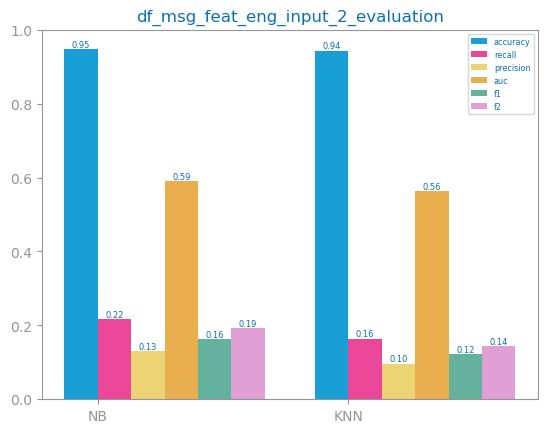

In [194]:
if evaluate == True:
    figure()
    eval_2: dict[str, list] = evaluate_approach(train_2, test_2, target='is_clicked', metric=target_metric)
    plot_multibar_chart(
        ["NB", "KNN"], eval_2, title=f"{file_tag}_2_evaluation", percentage=True
    )
    savefig(f"images/{file_tag}_2_evaluation.png")
    show()

# Approach uplift comparison

## uplift df

In [195]:
if evaluate == True:
    
    algorithms = ['Naive Bayes', 'KNN']

    # Create DataFrames for eval_1 and eval_2
    df_eval_1 = pd.DataFrame(eval_1, index=algorithms)
    df_eval_2 = pd.DataFrame(eval_2, index=algorithms)

    # Calculate uplift
    df_uplift = df_eval_2 - df_eval_1



    # Combine everything into one DataFrame (without misalignment issues)
    comparison_df = pd.concat([df_eval_1, df_eval_2, df_uplift], axis=1)
    comparison_df.columns = pd.MultiIndex.from_product([['Approach 1', 'Approach 2', 'Uplift'], eval_1.keys()])



    # Display the DataFrame
    display(comparison_df)

Approach 1                                                    \
              accuracy    recall precision       auc        f1        f2   
Naive Bayes   0.968042  0.193315  0.268395  0.590189  0.224751  0.204772   
KNN           0.932664  0.161999  0.075914  0.556792  0.103382  0.132050   

            Approach 2                                                    \
              accuracy    recall precision       auc        f1        f2   
Naive Bayes   0.946468  0.217404  0.130278  0.590886  0.162925  0.191756   
KNN           0.943286  0.163806  0.096677  0.563114  0.121591  0.143832   

               Uplift                                                    
             accuracy    recall precision       auc        f1        f2  
Naive Bayes -0.021575  0.024089 -0.138117  0.000697 -0.061826 -0.013016  
KNN          0.010621  0.001807  0.020763  0.006322  0.018209  0.011781

# Analysis



# save to csv

In [198]:
if test_data==False:
    
    data_save=data.copy()

    data_save=apply_strategy_1(data_save)
        
    data_save.to_csv(f"dataset/df_msg_feat_eng.csv", index=False)

    print(data_save.columns)

Variance threshold: 0.06, Remaining features: 18
Variables to drop: ['email_provider', 'topic', 'subject_length', 'subject_with_personalization', 'subject_with_deadline', 'subject_with_bonuses', 'subject_with_discount', 'subject_with_saleout', 'hour_cos']
columns to drop: ['email_provider', 'topic', 'subject_length', 'subject_with_personalization', 'subject_with_deadline', 'subject_with_bonuses', 'subject_with_discount', 'subject_with_saleout', 'hour_cos']
Remaining columns: Index(['platform', 'campaign_type', 'channel_cmp', 'total_count',
       'subject_with_emoji', 'day_of_year', 'is_weekend', 'month',
       'time_of_day', 'hour_sin', 'min_sin', 'min_cos', 'day_of_month_sin',
       'day_of_month_cos', 'day_of_week_nr_sin', 'day_of_week_nr_cos',
       'week_of_month_sin', 'week_of_month_cos', 'is_clicked'],
      dtype='object')
Index(['platform', 'campaign_type', 'channel_cmp', 'total_count',
       'subject_with_emoji', 'day_of_year', 'is_weekend', 'month',
       'time_of_day',

## train test csv

In [199]:
if test_data==False:
    

    # data_save_copy=data_save.copy() 
    # y, X, labels, class_counts = define_target_and_prepare_data(data_save_copy, target=target)
    # train, test = split_data_save_csv(pd.DataFrame(X, columns=data_save_copy.columns), y, data_columns=data_save_copy.columns, target_column=target)  

    
    train,test=simple_split_df(data_save,sort_by='day_of_year')
    
    train.to_csv(f"dataset/df_msg_feat_eng_train.csv", index=False)
    print(train.columns)
    
    test.to_csv(f"dataset/df_msg_feat_eng_test.csv", index=False)
    print(test.columns)

Index(['platform', 'campaign_type', 'channel_cmp', 'total_count',
       'subject_with_emoji', 'day_of_year', 'is_weekend', 'month',
       'time_of_day', 'hour_sin', 'min_sin', 'min_cos', 'day_of_month_sin',
       'day_of_month_cos', 'day_of_week_nr_sin', 'day_of_week_nr_cos',
       'week_of_month_sin', 'week_of_month_cos', 'is_clicked'],
      dtype='object')
Index(['platform', 'campaign_type', 'channel_cmp', 'total_count',
       'subject_with_emoji', 'day_of_year', 'is_weekend', 'month',
       'time_of_day', 'hour_sin', 'min_sin', 'min_cos', 'day_of_month_sin',
       'day_of_month_cos', 'day_of_week_nr_sin', 'day_of_week_nr_cos',
       'week_of_month_sin', 'week_of_month_cos', 'is_clicked'],
      dtype='object')
